In [1]:
import numpy as np
import matplotlib.pyplot as plt

cases_data = np.genfromtxt("cases_comparation.csv", delimiter = ',', skip_header = 1)[:, 1:] / 1000000
cases = ['GEMASOLAR', 'Caso Base', 'Enfriamiento Evaporativo', 'Enfriamiento Seco', 'Enfriamiento Once Through', 'Enfriamiento MED']
months = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # 2 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize= 16)

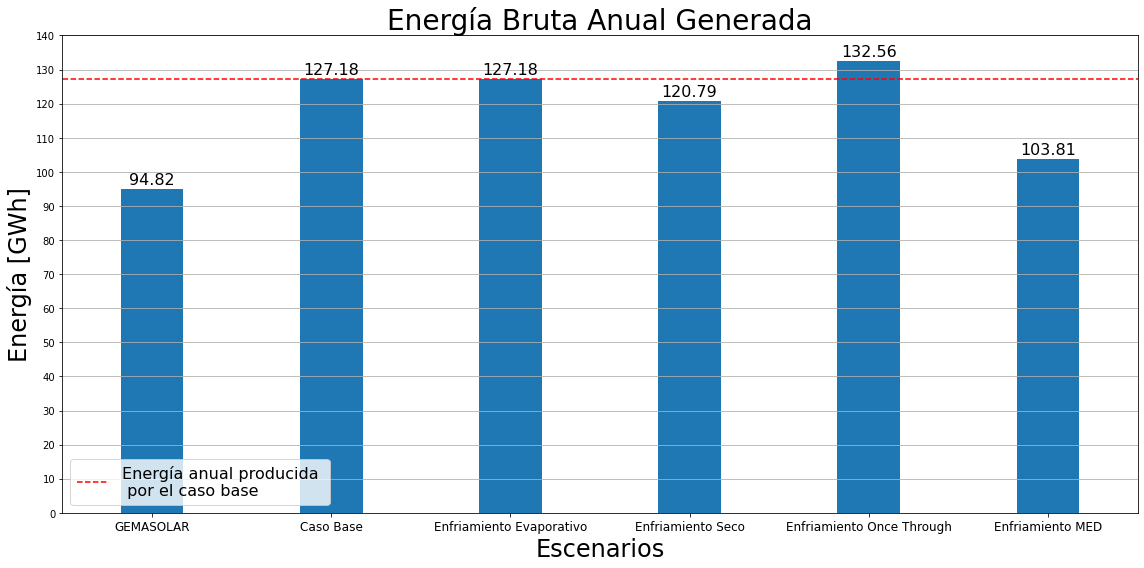

In [15]:
annual_gen = [94.82, 127.18, 127.18, 120.79, 132.56, 103.81]

x = np.arange(len(cases))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x, annual_gen, width)
ax.plot([-1, 8], [annual_gen[1], annual_gen[1]], 'r--',
        label= 'Energía anual producida \n por el caso base'
        )

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Energía [GWh]', fontsize= 24)
ax.set_xlabel('Escenarios', fontsize= 24)
ax.set_title('Energía Bruta Anual Generada', fontsize= 28)
ax.set_xticks(x)
ax.set_yticks(np.arange(0, 150, 10))
ax.set_ylim(0, 140)
ax.set_xlim(-0.5, 5.5)
ax.set_xticklabels(cases, fontsize= 12)
ax.legend(loc='lower left', fontsize= 16)
ax.grid(axis= 'y')

autolabel(rects1)

fig.tight_layout()
plt.savefig('annual_energy_comparison.png', format='png', bbox_inches='tight')
plt.show()

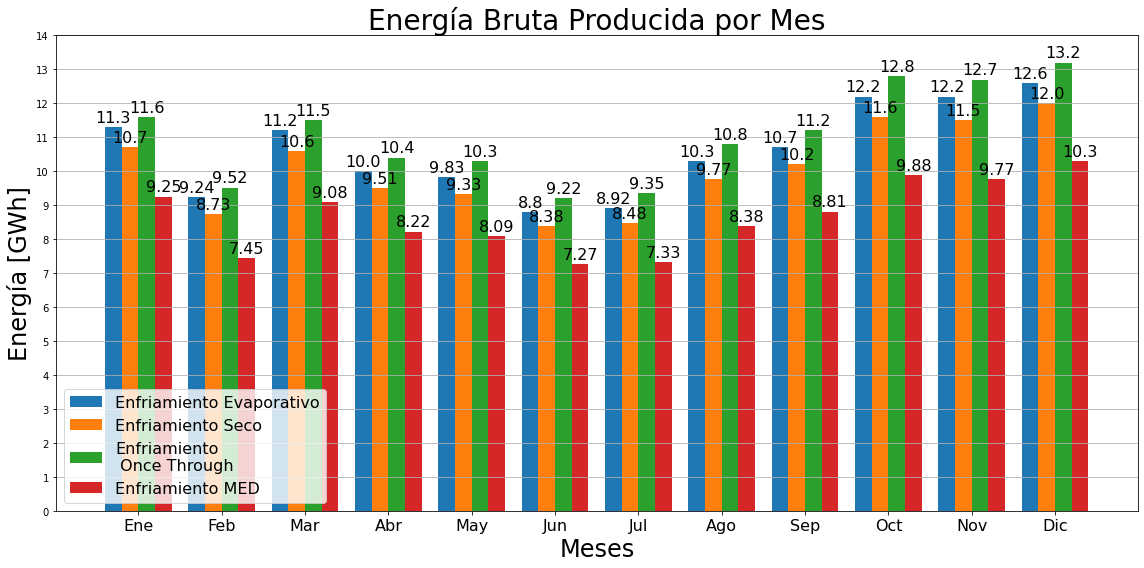

In [3]:
## ONLY CHILE CASES W BASE CASE##
x = np.arange(len(months))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
#gemasolar = ax.bar(x - 2*width, cases_data[:, 0], width, label='Gemasolar')
case_base = ax.bar(x - 3*width/2, cases_data[:, 1], width,
                   label='Enfriamiento Evaporativo')
case_a = ax.bar(x - width/2, cases_data[:, 2], width,
                label='Enfriamiento Seco')
case_b = ax.bar(x + width/2, cases_data[:, 3], width,
                label='Enfriamiento\n Once Through')
case_c = ax.bar(x + 3*width/2, cases_data[:, 4], width,
                label='Enfriamiento MED')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Energía [GWh]', fontsize= 24)
ax.set_xlabel('Meses', fontsize= 24)
ax.set_title('Energía Bruta Producida por Mes', fontsize= 28)
ax.set_xticks(x)
ax.set_yticks(np.arange(0, 15, 1))
ax.set_ylim(0, 14)
ax.set_xticklabels(months, fontsize= 16)
ax.legend(loc='lower left', fontsize= 16)
ax.grid(axis= 'y')

#autolabel(gemasolar)
autolabel(case_base)
autolabel(case_a)
autolabel(case_b)
autolabel(case_c)

fig.tight_layout()
plt.savefig('cases_comparison_w_basecase.png', format='png', bbox_inches='tight')
plt.show()

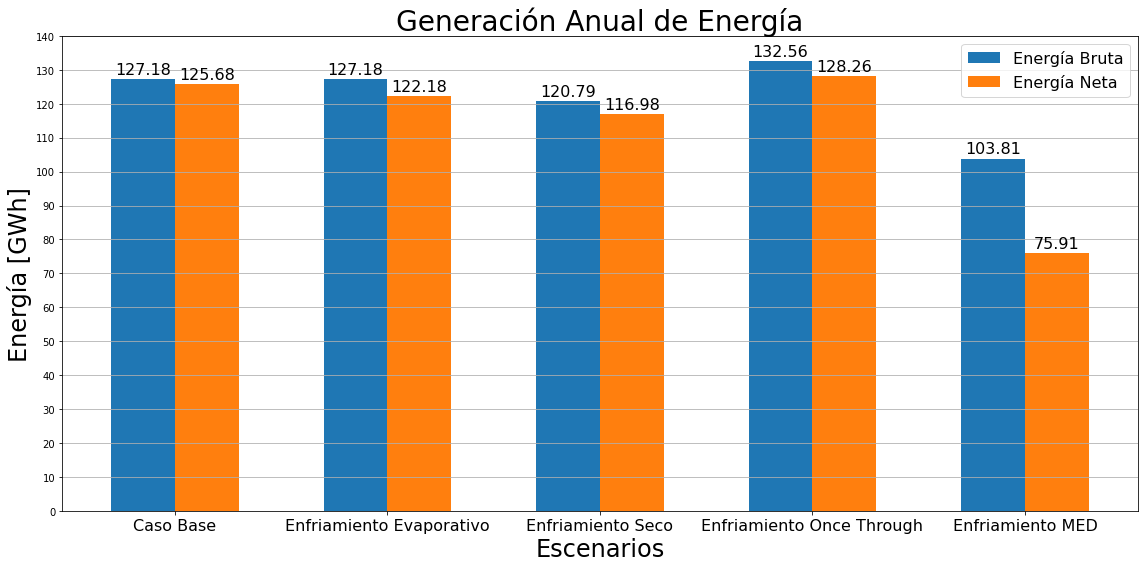

In [4]:
annual_gen = [127.18, 127.18, 120.79, 132.56, 103.81]
annual_netgen = [127.18 - 1.5, 127.18 - 5, 120.79 - 3.81, 132.56 - 4.3, 103.81 - 27.9]

x = np.arange(len(cases[1:]))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width/2, annual_gen, width, label= 'Energía Bruta')
rects2 = ax.bar(x + width/2, annual_netgen, width, label= 'Energía Neta')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Energía [GWh]', fontsize= 24)
ax.set_xlabel('Escenarios', fontsize= 24)
ax.set_title('Generación Anual de Energía', fontsize= 28)
ax.set_xticks(x)
ax.set_yticks(np.arange(0, 150, 10))
ax.set_ylim(0, 140)
ax.set_xticklabels(cases[1:], fontsize= 16)
ax.grid(axis= 'y')
ax.legend(fontsize= 16)

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.savefig('annual_energy_parasitic.png', format='png', bbox_inches='tight')
plt.show()

## Water use

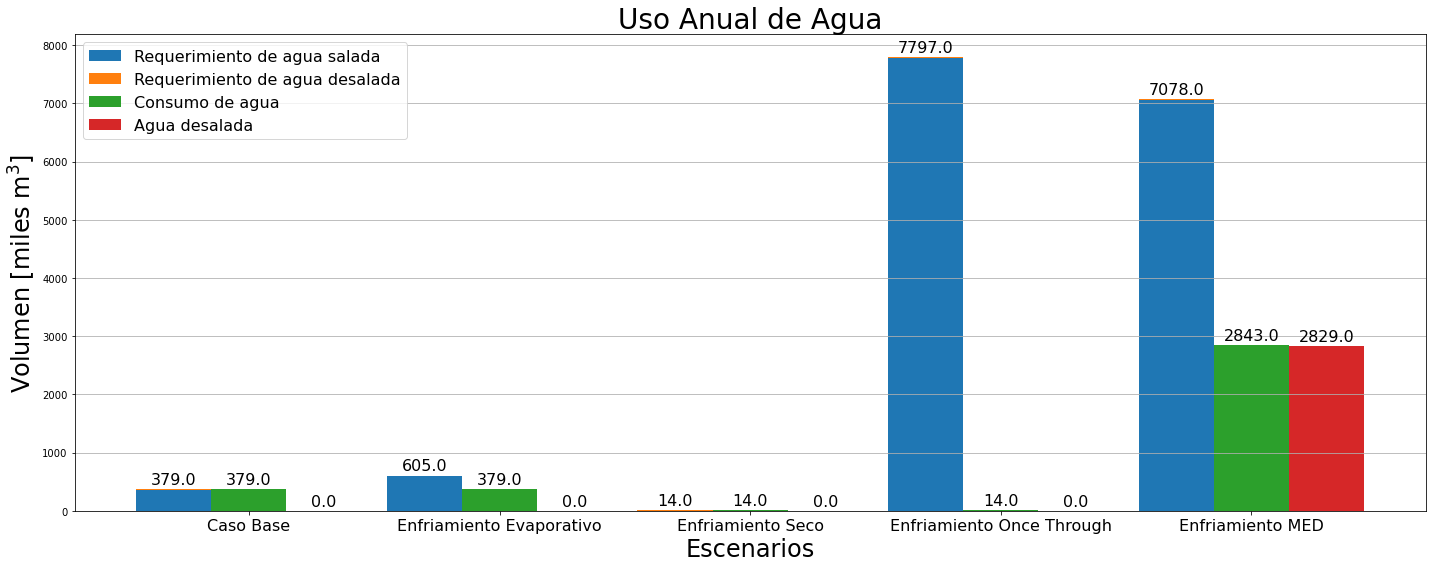

In [7]:
r_desalt_water = np.round(np.array([14004, 14004, 14005, 14004, 13811])/1000,0)
r_salt_water = np.round(np.array([365181, 591300, 0, 7782518, 7064064])/1000,0)
r_total_water= r_desalt_water + r_salt_water
consumed_water = np.round(np.array([379185, 379185, 14005,14004,2842590])/1000,0)
produced_water = np.round(np.array([0, 0, 0, 0, 2828779])/1000,0)

x = np.arange(len(cases[1:]))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 8))
rects0 = ax.bar(x - width, r_total_water, width, color= 'black')
rects1 = ax.bar(x - width, r_salt_water, width, label= 'Requerimiento de agua salada')
rects2 = ax.bar(x - width, r_desalt_water, width, bottom= r_salt_water, label= 'Requerimiento de agua desalada')
rects3 = ax.bar(x, consumed_water, width, label= 'Consumo de agua')
rects4 = ax.bar(x + width, produced_water, width, label= 'Agua desalada')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'Volumen [miles m$^3$]', fontsize= 24)
ax.set_xlabel('Escenarios', fontsize= 24)
ax.set_title('Uso Anual de Agua', fontsize= 28)
ax.set_xticks(x)
#ax.set_yticks(np.arange(0, 150, 10))
#ax.set_ylim(0, 140)
ax.set_xticklabels(cases[1:], fontsize= 16)
ax.grid(axis= 'y')
ax.legend(fontsize= 16)

autolabel(rects0)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()
plt.savefig('annual_water_use.png', format='png', bbox_inches='tight')
plt.show()

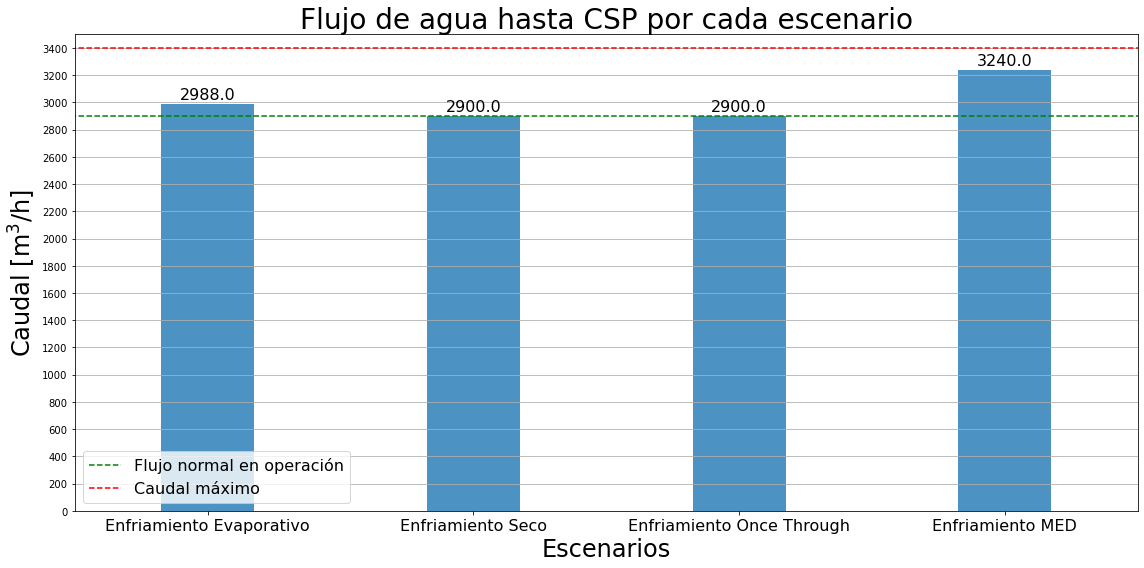

In [24]:
water_transported = np.array([.83*3600, 2900, 2900, .9*3600])

x = np.arange(len(cases[2:]))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x, water_transported, width, alpha= .8)
ax.plot([-1, 8], [2900, 2900], 'g--',
        label= 'Flujo normal en operación'
        )
ax.plot([-1, 8], [3400, 3400], 'r--',
        label= 'Caudal máximo'
        )

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'Caudal [m$^3$/h]', fontsize= 24)
ax.set_xlabel('Escenarios', fontsize= 24)
ax.set_title('Flujo de agua hasta CSP por cada escenario', fontsize= 28)
ax.set_xticks(x)
ax.set_xlim(-0.5, 3.5)
ax.set_yticks(np.arange(0, 3600, 200))
ax.set_ylim(0, 3500)
ax.set_xticklabels(cases[2:], fontsize= 16)
ax.legend(loc= 'lower left',fontsize= 16)
ax.grid(axis= 'y')

autolabel(rects1)

fig.tight_layout()
plt.savefig('water_flow_comparison.png', format='png', bbox_inches='tight')
plt.show()